In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()



In [3]:
x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32') /255.0

In [4]:
#建立Sequential线性堆叠模型
model =tf.keras.models.Sequential()

#第1个卷积层
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),input_shape = (32, 32, 3),activation ='relu',padding ='same'))
#防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))
#第1个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#第2个卷积层
model.add(tf.keras.layers.Conv2D(filters= 64,kernel_size =(3,3),activation ='relu',padding ='same'))
#防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))
#第2个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# 平坦层
model.add(tf.keras.layers.Flatten())
#添加输出层
model.add(tf.keras.layers.Dense(10, activation ='softmax'))

In [5]:
#模型摘要
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [6]:
#设置训练参数
train_epochs = 20 #训练轮数
batch_size = 100 #单词次训练样本数

In [7]:
#定义训练模式
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [8]:
#训练模型
train_history=model.fit(x_train, y_train, validation_split = 0.2, epochs=train_epochs, batch_size= batch_size, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 - 7s - loss: 1.5927 - accuracy: 0.4318 - val_loss: 1.4867 - val_accuracy: 0.5265
Epoch 2/20
40000/40000 - 3s - loss: 1.2400 - accuracy: 0.5657 - val_loss: 1.2852 - val_accuracy: 0.6010
Epoch 3/20
40000/40000 - 3s - loss: 1.1017 - accuracy: 0.6155 - val_loss: 1.1997 - val_accuracy: 0.6235
Epoch 4/20
40000/40000 - 3s - loss: 1.0184 - accuracy: 0.6458 - val_loss: 1.1351 - val_accuracy: 0.6469
Epoch 5/20
40000/40000 - 3s - loss: 0.9557 - accuracy: 0.6661 - val_loss: 1.0735 - val_accuracy: 0.6699
Epoch 6/20
40000/40000 - 3s - loss: 0.9085 - accuracy: 0.6855 - val_loss: 1.0261 - val_accuracy: 0.6795
Epoch 7/20
40000/40000 - 3s - loss: 0.8716 - accuracy: 0.6990 - val_loss: 1.0044 - val_accuracy: 0.6843
Epoch 8/20
40000/40000 - 3s - loss: 0.8415 - accuracy: 0.7068 - val_loss: 0.9941 - val_accuracy: 0.6767
Epoch 9/20
40000/40000 - 3s - loss: 0.8130 - accuracy: 0.7197 - val_loss: 0.9830 - val_accuracy: 0.6903
Epoch 10/20
40

In [9]:
def visu_train_history(train_history,train_metric,validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

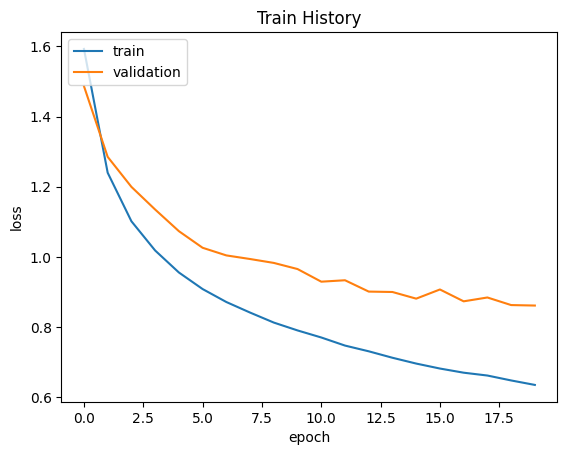

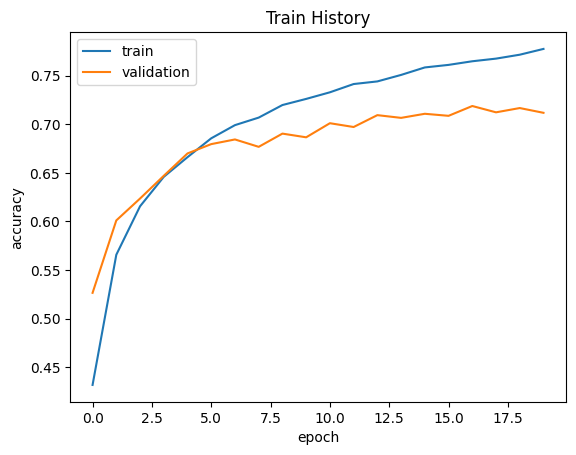

10000/10000 - 1s - loss: 0.8607 - accuracy: 0.7116
Test accuracy: 0.7116


In [10]:
visu_train_history(train_history,'loss','val_loss')
visu_train_history(train_history,'accuracy','val_accuracy')

#评估模型
test_loss, test_acc=model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)